In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

#1. MNIST 데이터셋 로딩

In [ ]:
(x_train, y_train) , (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#2. 데이터 전처리

In [ ]:
# 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train. shape: ",x_train.shape )

x_train. shape:  (60000, 28, 28)


In [ ]:
# 차원 확장
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

# 라벨 수 = K
K = len(set(y_train))
print(K)

# sparse category
print(y_train)

(60000, 28, 28, 1)
10
[5 0 4 ... 5 6 8]


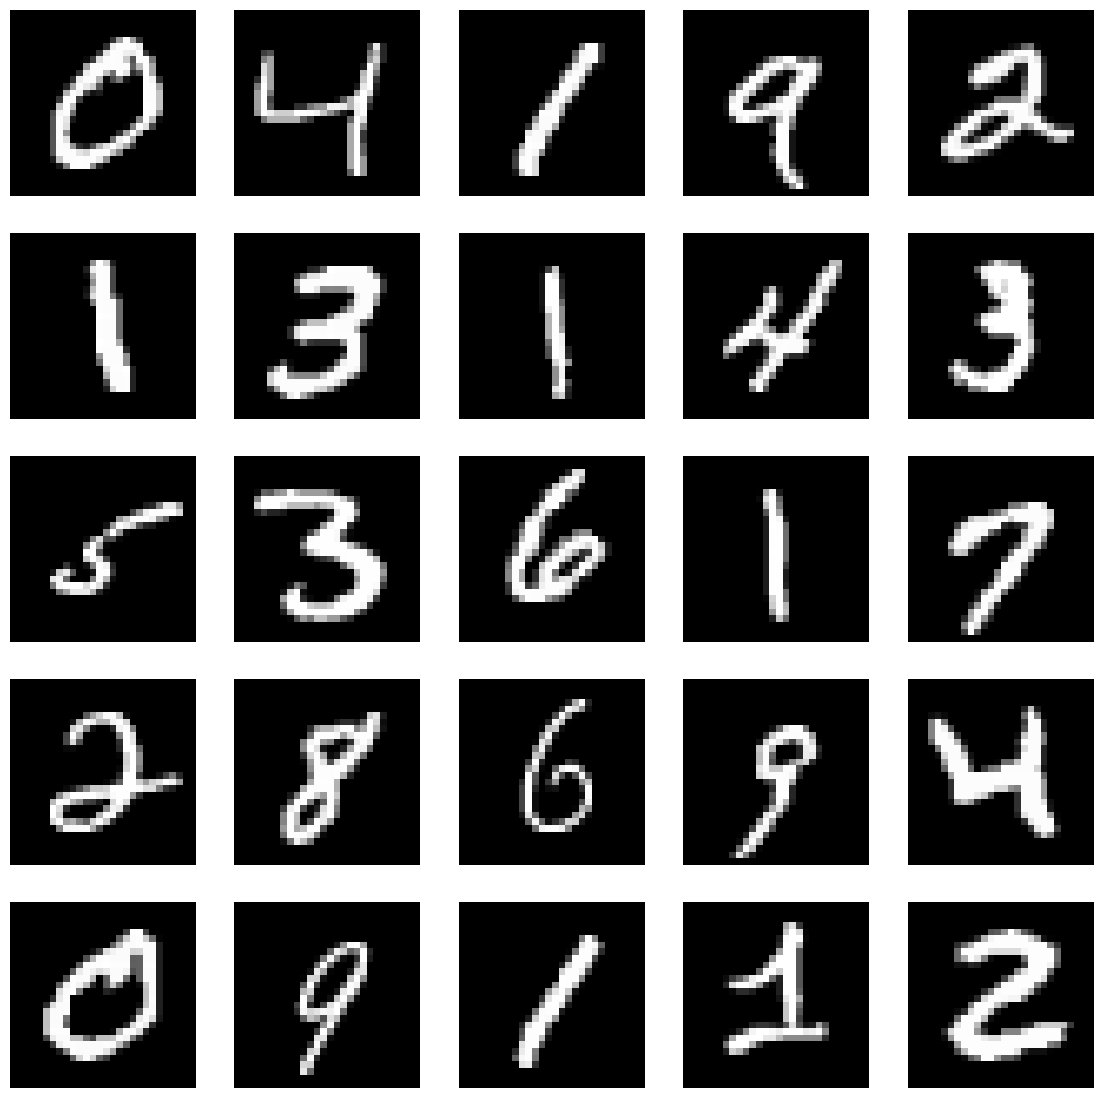

In [ ]:
# 이미지 데이터 확인
plt.figure(figsize=(14, 14))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plt.imshow(x_train[i], 'gray')
    plt.axis('off')
plt.show()

#3. CNN 모델 설계
### optimizer = Adam

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
# 1. Convolution

i = Input(shape = x_train[0].shape)

# Conv2D(filters, kernel_size, strides, activation)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu' )(i)

x = Conv2D(64, (3,3), strides = 2, activation = 'relu' )(x)

x = Conv2D(128, (3,3), strides = 2, activation = 'relu' )(x)

In [ ]:
x = Flatten()(x)

# Overfitting 방지
x = Dropout(0.2)(x)

In [ ]:
# 2. ANN

x = Dense(512, activation = 'relu')(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
r = model.fit(x_train,y_train, validation_data=(x_test, y_test) , epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 34s 16ms/step - loss: 0.1758 - accuracy: 0.9470 - val_loss: 0.0543 - val_accuracy: 0.9829
Epoch 2/15
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.0424 - val_accuracy: 0.9863
Epoch 3/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0381 - val_accuracy: 0.9887
Epoch 4/15
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0351 - accuracy: 0.9886 - val_loss: 0.0425 - val_accuracy: 0.9883
Epoch 5/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0357 - val_accuracy: 0.9899
Epoch 6/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0243 - accuracy: 0.9919 - val_loss: 0.0418 - val_accuracy: 0.9894
Epoch 7/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0473 -

#4. 손실도/정확도 그래프 출력

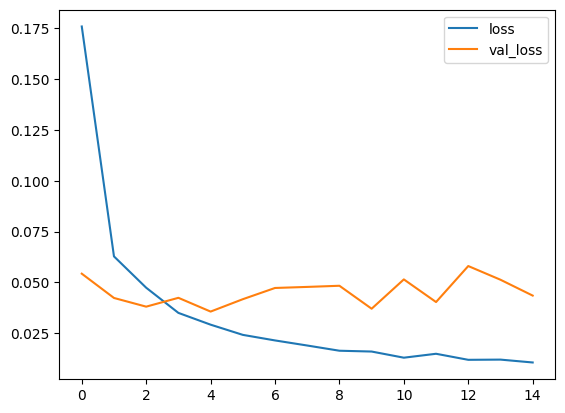

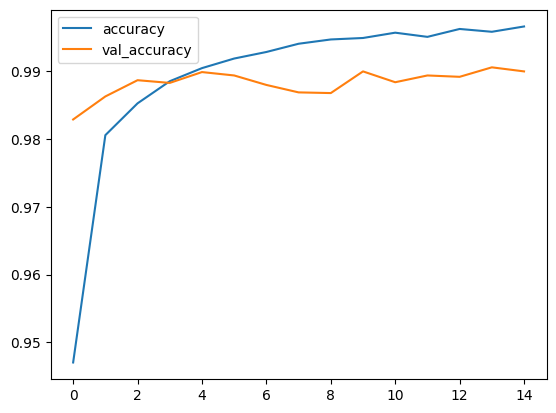

In [ ]:
plt.plot(r.history['loss'] , label='loss')
plt.plot(r.history['val_loss'] , label='val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'] , label='accuracy')
plt.plot(r.history['val_accuracy'] , label='val_accuracy')
plt.legend()
plt.show()

###optimizer = RMSprop

In [ ]:
# optimizer 변경 (Adam → RMSprop)
model.compile(optimizer='RMSprop',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
r = model.fit(x_train,y_train, validation_data=(x_test, y_test) , epochs= 15)

Epoch 1/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1752 - accuracy: 0.9455 - val_loss: 0.0725 - val_accuracy: 0.9778
Epoch 2/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0665 - accuracy: 0.9801 - val_loss: 0.0450 - val_accuracy: 0.9857
Epoch 3/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0494 - accuracy: 0.9853 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 4/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0377 - accuracy: 0.9888 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 5/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0319 - accuracy: 0.9907 - val_loss: 0.0447 - val_accuracy: 0.9872
Epoch 6/15
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0269 - accuracy: 0.9922 - val_loss: 0.0370 - val_accuracy: 0.9903
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0228 - accuracy: 0.9933 - val_loss: 0.0505 -

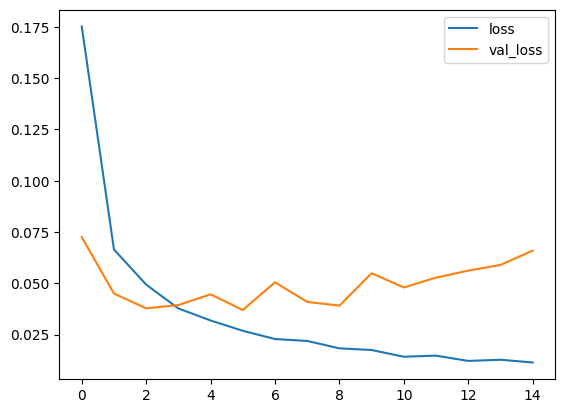

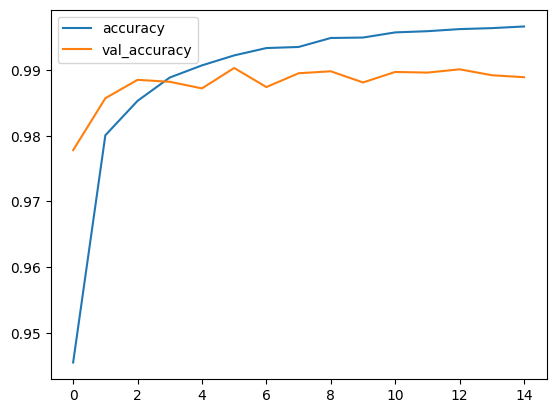

In [ ]:
plt.plot(r.history['loss'] , label='loss')
plt.plot(r.history['val_loss'] , label='val_loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'] , label='accuracy')
plt.plot(r.history['val_accuracy'] , label='val_accuracy')
plt.legend()
plt.show()